<a href="https://colab.research.google.com/github/Umobit/Natural-Gas/blob/main/NGC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [ ]:
ng = pd.read_excel('/content/NGC Gas (1).xlsx')

In [ ]:
ng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Density                                      1418 non-null   float64
 1   Propane                                      1418 non-null   float64
 2   i-butane                                     1418 non-null   float64
 3   n-butane                                     1418 non-null   int64  
 4   i-pentane                                    1418 non-null   float64
 5   n-pentane                                    1418 non-null   float64
 6   NITROGEN

                                   1418 non-null   float64
 7   Methane                                      1418 non-null   float64
 8   Carbon 
Dioxide                              1418 non-null   float64
 9   Ethane                                       1418 non-null   float64
 10  

In [ ]:
ng

,Density,Propane,i-butane,n-butane,i-pentane,n-pentane,NITROGEN\n\n,Methane,Carbon \nDioxide,Ethane,On line Heating value \nas gas chromotograph
0,0.78930,1.4000,0.2600,0,0.1000,0.0700,0.9700,87.7300,3.1400,6.1800,1058.28
1,0.78995,1.3800,0.2700,0,0.1000,0.0700,0.9500,87.6900,3.2100,6.1900,1057.81
2,0.78219,1.1100,0.2300,0,0.0800,0.0500,0.8500,88.3900,3.1500,6.0100,1051.06
3,0.78202,1.1200,0.2200,0,0.0800,0.0600,0.8700,88.4000,3.1100,6.0300,1051.66
4,0.78404,1.2300,0.2300,0,0.0900,0.0600,0.8600,88.2100,3.0300,6.1600,1056.39
...,...,...,...,...,...,...,...,...,...,...,...
1413,0.80830,2.5741,0.4308,0,0.1366,0.0972,1.0265,86.3729,3.5628,5.7290,1068.28
1414,0.81150,2.7217,0.5888,0,0.1524,0.1056,1.2305,86.1330,3.3793,5.6244,1073.53
1415,0.81840,3.0727,0.7923,0,0.1528,0.1069,1.3400,85.5914,3.2542,5.6278,1083.52
1416,0.81680,3.1812,0.8379,0,0.1517,0.1020,1.3955,85.6104,2.8230,5.8335,1091.49


In [ ]:
gas = ng[['Propane','i-butane', 'Methane',	'Carbon \nDioxide',	'Ethane', 'On line Heating value \nas gas chromotograph', 'Density']]

In [ ]:
gas

,Propane,i-butane,Methane,Carbon \nDioxide,Ethane,On line Heating value \nas gas chromotograph,Density
0,1.4000,0.2600,87.7300,3.1400,6.1800,1058.28,0.78930
1,1.3800,0.2700,87.6900,3.2100,6.1900,1057.81,0.78995
2,1.1100,0.2300,88.3900,3.1500,6.0100,1051.06,0.78219
3,1.1200,0.2200,88.4000,3.1100,6.0300,1051.66,0.78202
4,1.2300,0.2300,88.2100,3.0300,6.1600,1056.39,0.78404
...,...,...,...,...,...,...,...
1413,2.5741,0.4308,86.3729,3.5628,5.7290,1068.28,0.80830
1414,2.7217,0.5888,86.1330,3.3793,5.6244,1073.53,0.81150
1415,3.0727,0.7923,85.5914,3.2542,5.6278,1083.52,0.81840
1416,3.1812,0.8379,85.6104,2.8230,5.8335,1091.49,0.81680


# New section

In [ ]:
gas['On line Heating value \nas gas chromotograph'].describe()

,On line Heating value \nas gas chromotograph
count,1418.00
unique,1254.00
top,1059.29
freq,4.00


In [ ]:
gas.describe()
#plt.savefig('describe')

,Propane,i-butane,Methane,Carbon \nDioxide,Ethane,Density
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,1.396911,0.297666,87.952859,3.428204,5.923004,0.790232
std,0.567635,0.124527,1.001192,1.000571,0.351366,0.014163
min,0.321900,0.056300,85.040900,1.162400,4.546800,0.751800
25%,1.010650,0.218800,87.343450,2.884925,5.775550,0.781600
50%,1.335550,0.291550,87.911900,3.207250,5.977700,0.790200
75%,1.749275,0.368450,88.642225,3.581000,6.159250,0.796875
max,3.538900,0.845600,90.924900,8.305400,6.731000,0.839900


In [ ]:
gas= gas[pd.to_numeric(gas['On line Heating value \nas gas chromotograph'], errors='coerce').notnull()]


In [ ]:
corr_ng = gas.corr().round(2)

In [ ]:
corr_ng

,Propane,i-butane,Methane,Carbon \nDioxide,Ethane,On line Heating value \nas gas chromotograph,Density
Propane,1.00,0.93,-0.73,-0.17,0.29,0.82,0.63
i-butane,0.93,1.00,-0.77,-0.06,0.21,0.73,0.70
Methane,-0.73,-0.77,1.00,-0.48,0.15,-0.29,-0.96
Carbon \nDioxide,-0.17,-0.06,-0.48,1.00,-0.84,-0.63,0.63
Ethane,0.29,0.21,0.15,-0.84,1.00,0.67,-0.36
On line Heating value \nas gas chromotograph,0.82,0.73,-0.29,-0.63,0.67,1.00,0.17
Density,0.63,0.70,-0.96,0.63,-0.36,0.17,1.00


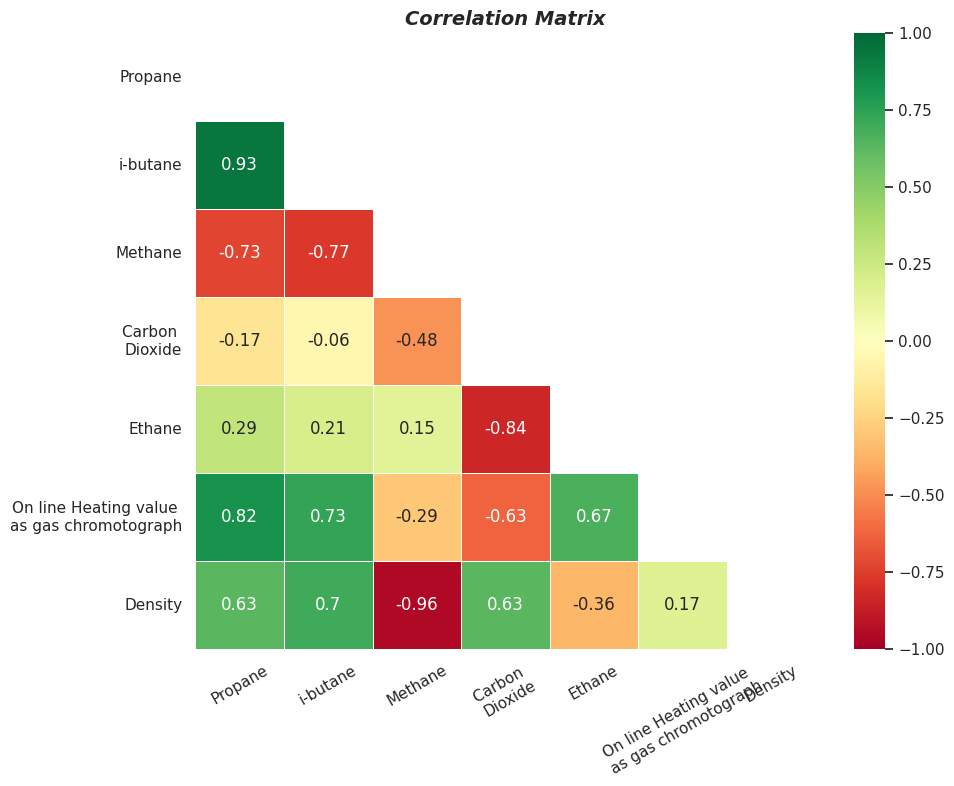

In [ ]:
plt.figure(figsize = (10, 8), dpi = 100)
mask = np.triu(np.ones_like(corr_ng, dtype = bool))
sns.set_theme(style = 'white')
sns.heatmap(corr_ng, annot= True, center = 0, mask = mask, linewidths  = .5, cmap = 'RdYlGn', vmin = -1, vmax = 1)
plt.xticks(rotation = 30)
plt.title('Correlation Matrix', fontdict = {'fontsize': 14, 'style':'oblique', 'weight': 'bold'})
plt.savefig('ngc Heatmap plot')

In [ ]:
gaso = ng[['Propane','i-butane', 'Methane',	'Carbon \nDioxide',	'Ethane']] #'On line Heating value \nas gas chromotograph', 'Density']]

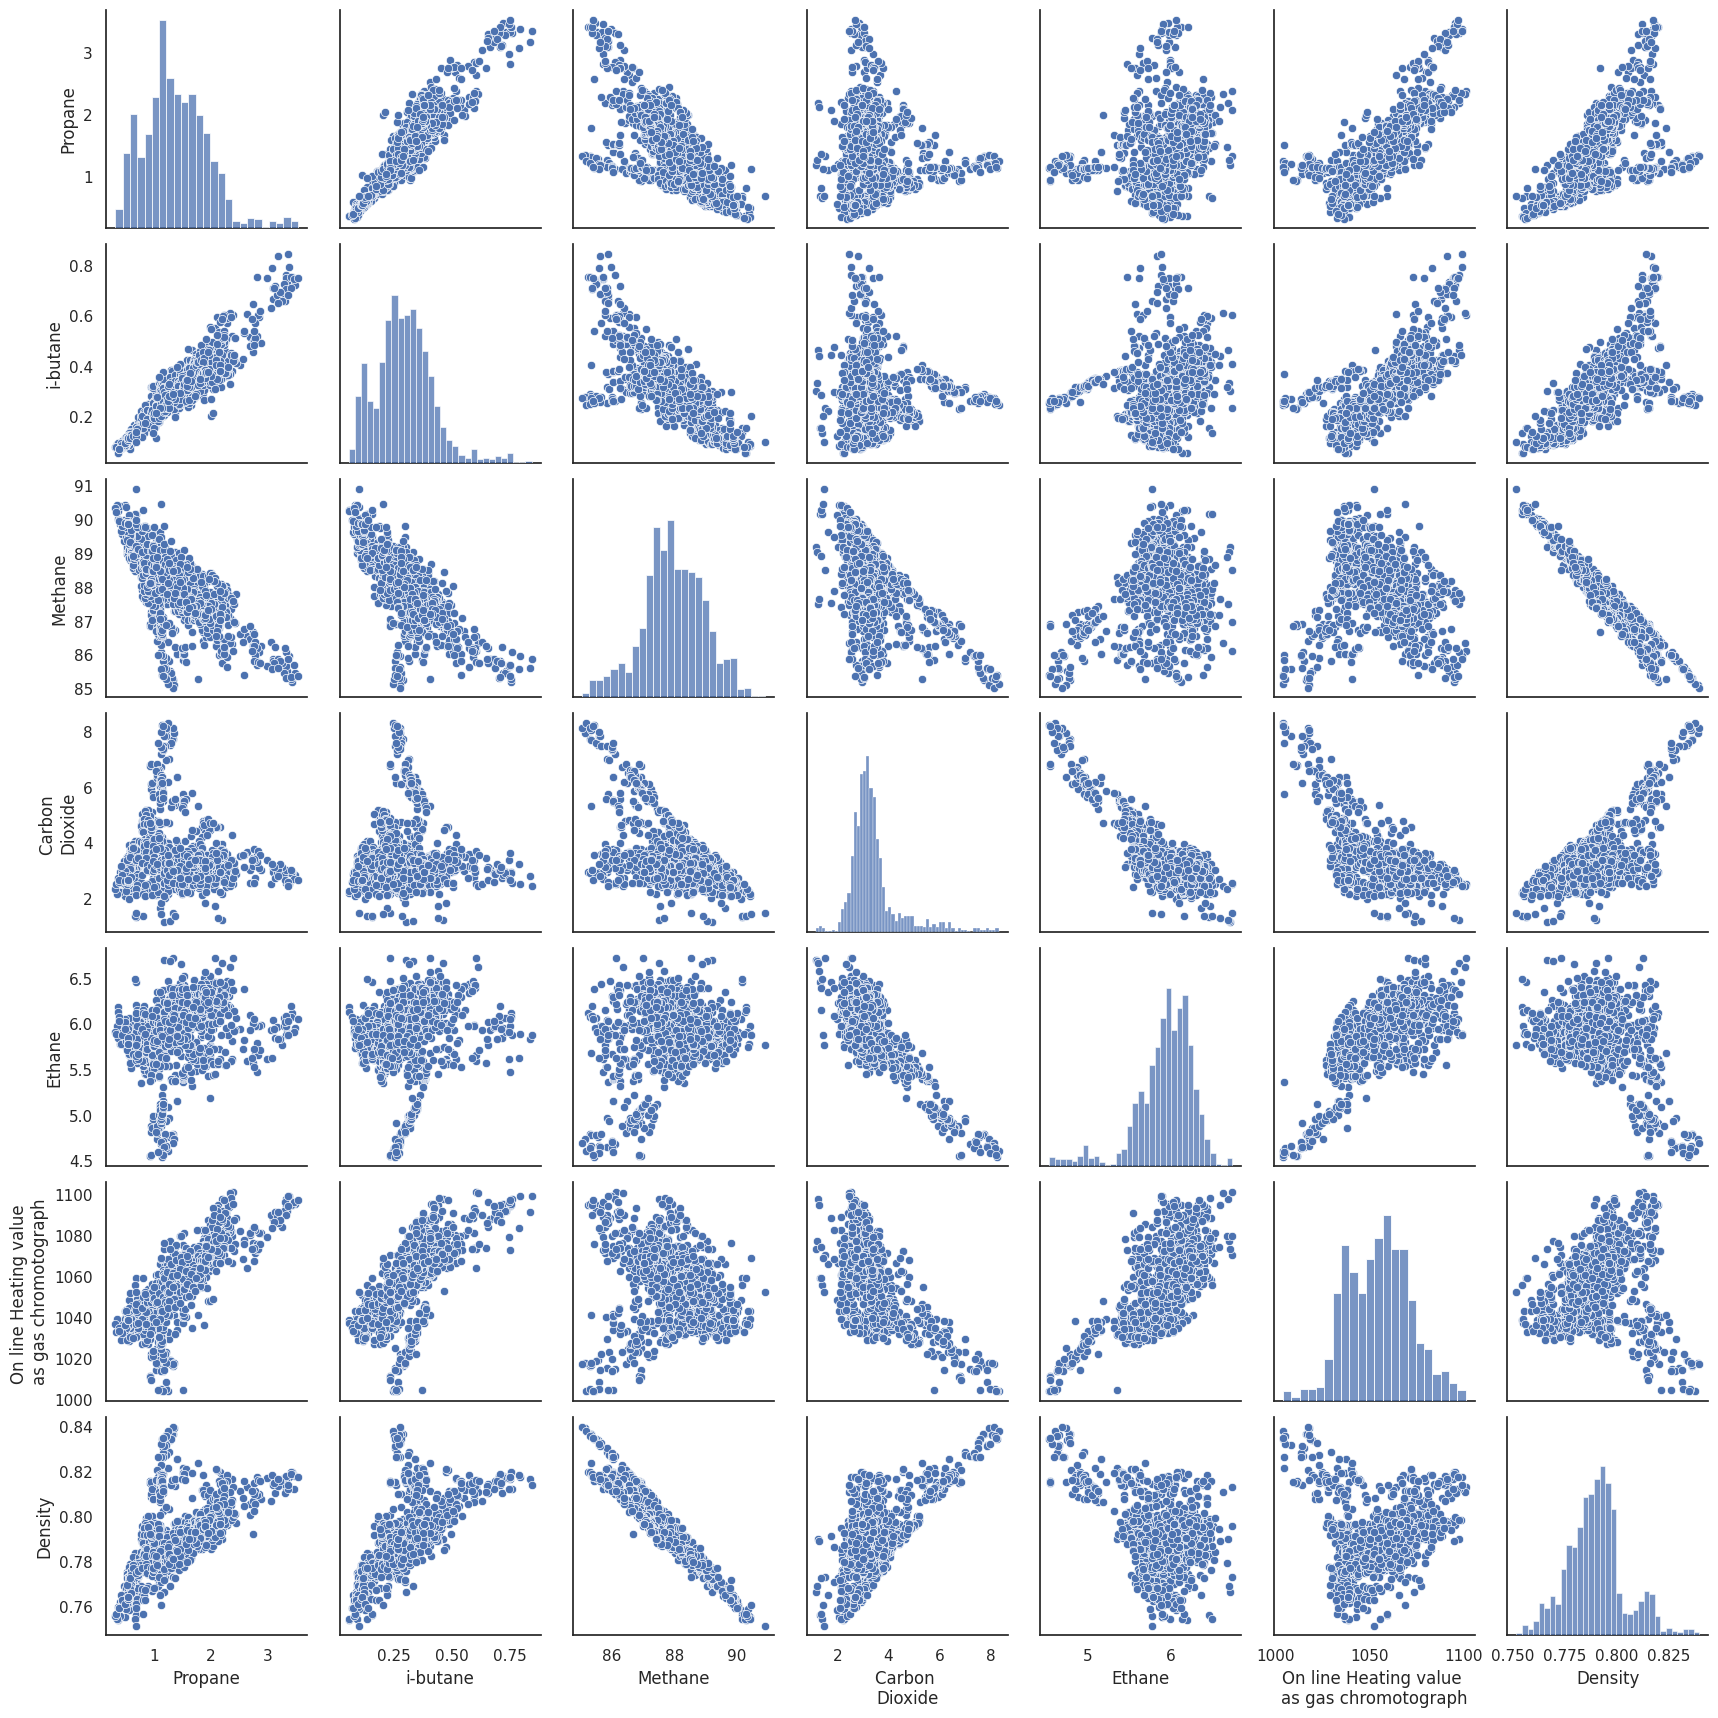

In [ ]:
sns.pairplot(gas)
plt.savefig('Ngc pairplot')

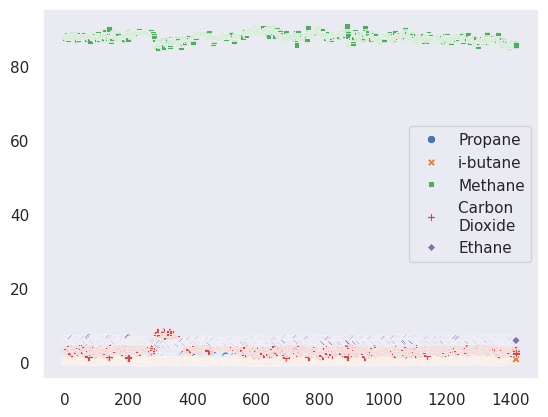

In [ ]:
sns.set_style('dark')
sns.scatterplot(gaso)
plt.savefig('NGC scatterplot')

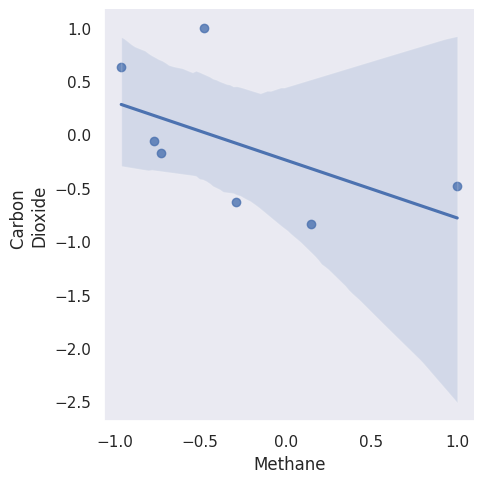

In [ ]:
sns.lmplot(x='Methane', y='Carbon \nDioxide', data=corr_ng)
plt.show()

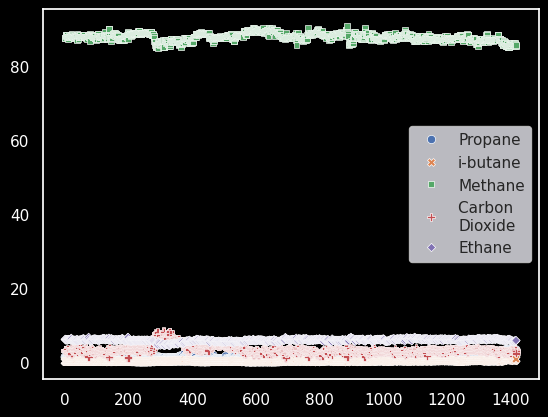

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes with black background
fig, ax = plt.subplots(facecolor='black')
ax.set_facecolor('black')

# Your Seaborn plot
sns.scatterplot(data=gaso, ax=ax)

# Optional: Set tick colors for better visibility
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('NGCs scatterplot')

In [ ]:
total_co2_concentration = gas['Carbon \nDioxide'].sum()
print(total_co2_concentration)

4855.6831999999995


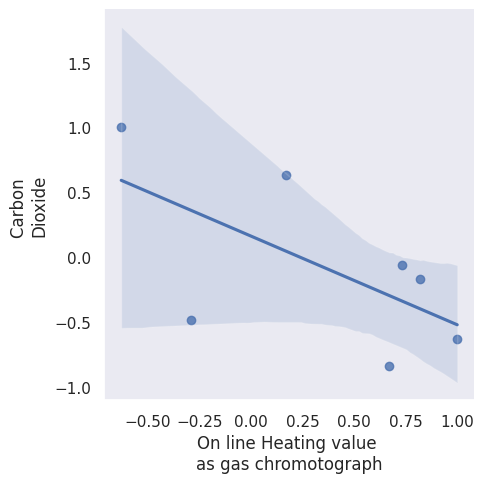

In [ ]:
sns.lmplot(x='On line Heating value \nas gas chromotograph', y='Carbon \nDioxide', data= corr_ng)
plt.show()

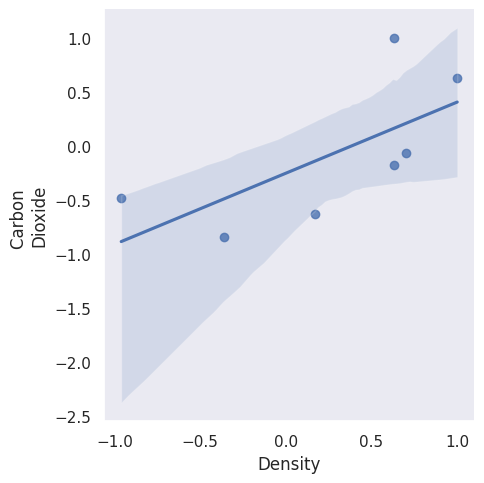

In [ ]:
sns.lmplot(x='Density', y='Carbon \nDioxide', data=corr_ng)
plt.show()

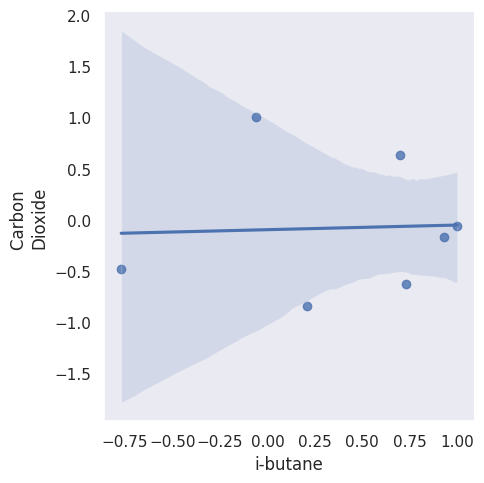

In [ ]:
sns.lmplot(x='i-butane', y='Carbon \nDioxide', data=corr_ng)
plt.show()

In [ ]:
corr_coef = np.abs(corr_ng.iloc[-4, :-4]).sort_values(ascending=False)
corr_coef


,Carbon \nDioxide
Methane,0.48
Propane,0.17
i-butane,0.06


In [ ]:
corr_ng

,Propane,i-butane,Methane,Carbon \nDioxide,Ethane,On line Heating value \nas gas chromotograph,Density
Propane,1.00,0.93,-0.73,-0.17,0.29,0.82,0.63
i-butane,0.93,1.00,-0.77,-0.06,0.21,0.73,0.70
Methane,-0.73,-0.77,1.00,-0.48,0.15,-0.29,-0.96
Carbon \nDioxide,-0.17,-0.06,-0.48,1.00,-0.84,-0.63,0.63
Ethane,0.29,0.21,0.15,-0.84,1.00,0.67,-0.36
On line Heating value \nas gas chromotograph,0.82,0.73,-0.29,-0.63,0.67,1.00,0.17
Density,0.63,0.70,-0.96,0.63,-0.36,0.17,1.00


In [ ]:
forest_clf = RandomForestRegressor(criterion = 'squared_error')
forest_clf.fit(gas.drop(columns = 'Carbon \nDioxide'), gas['Carbon \nDioxide'])
gini_importance = pd.Series(index=gas.columns[:-1], data = forest_clf.feature_importances_).sort_values(ascending = False)
gini_importance

,0
Carbon \nDioxide,0.750936
On line Heating value \nas gas chromotograph,0.097958
Ethane,0.087802
Methane,0.051307
Propane,0.006151
i-butane,0.005847


In [ ]:
forest_clf = RandomForestRegressor(criterion = 'squared_error')
forest_clf.fit(gas.drop(columns = 'Carbon \nDioxide'), gas['Carbon \nDioxide'])
# get the column names of the feature columns
feature_columns = gas.columns[0:3].to_list() + gas.columns[7:].to_list()
gini_importance = pd.Series(index=feature_columns, data = forest_clf.feature_importances_).sort_values(ascending = False)
gini_importance

ValueError: Length of values (6) does not match length of index (3)

In [ ]:
forest_clf = RandomForestRegressor(criterion = 'squared_error')
forest_clf.fit(gas.drop(columns = 'Carbon \nDioxide'), gas['Carbon \nDioxide'])
# get the column names of the feature columns, which are all columns of gas except 'Carbon \nDioxide'
feature_columns = gas.drop(columns = 'Carbon \nDioxide').columns
gini_importance = pd.Series(index=feature_columns, data = forest_clf.feature_importances_).sort_values(ascending = False)
gini_importance

,0
Ethane,0.751293
Density,0.096543
On line Heating value \nas gas chromotograph,0.087131
Methane,0.053317
i-butane,0.005985
Propane,0.005731


In [ ]:
feature_importance = pd.DataFrame({'Pearson':corr_coef.index, 'Gini': gini_importance.index[:3]})
feature_importance.index = np.arange(1,4)
feature_importance

,Pearson,Gini
1,Methane,Ethane
2,Propane,Density
3,i-butane,On line Heating value \nas gas chromotograph


In [ ]:
ng= ng[pd.to_numeric(ng['On line Heating value \nas gas chromotograph'], errors='coerce').notnull()]

In [ ]:
x = ng[['Propane','i-butane', 'Methane',	'Ethane', 'On line Heating value \nas gas chromotograph', 'Density']]

In [ ]:
y = ng[['Carbon \nDioxide']]

In [ ]:
x

,Propane,i-butane,Methane,Ethane,On line Heating value \nas gas chromotograph,Density
0,1.4000,0.2600,87.7300,6.1800,1058.28,0.78930
1,1.3800,0.2700,87.6900,6.1900,1057.81,0.78995
2,1.1100,0.2300,88.3900,6.0100,1051.06,0.78219
3,1.1200,0.2200,88.4000,6.0300,1051.66,0.78202
4,1.2300,0.2300,88.2100,6.1600,1056.39,0.78404
...,...,...,...,...,...,...
1413,2.5741,0.4308,86.3729,5.7290,1068.28,0.80830
1414,2.7217,0.5888,86.1330,5.6244,1073.53,0.81150
1415,3.0727,0.7923,85.5914,5.6278,1083.52,0.81840
1416,3.1812,0.8379,85.6104,5.8335,1091.49,0.81680


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc_x_test = sc.fit_transform(x_train)
sc_x_train = sc.fit_transform(x_test)

In [ ]:
#Parameter Tuning

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Random Forest
forest_rparams = {'n_estimators': np.logspace(1, 4, 50).astype(int), 'max_depth': np.logspace(1, 3, 20).astype(int), 'bootstrap': [True, False]}

In [ ]:
def rsearch(iter:int, est, params, x, y, n_cv = 3):
    randomized_search = RandomizedSearchCV(estimator=est, param_distributions=params, n_iter=iter, scoring='neg_root_mean_squared_error', verbose=0, cv = n_cv, n_jobs=-1)
    randomized_search.fit(x, y)
    return randomized_search

In [ ]:
rsearch

<function __main__.rsearch(iter: int, est, params, x, y, n_cv=3)>

In [ ]:
#forest_rsearch = rsearch(iter = 200, est = RandomForestRegressor(criterion='squared_error', random_state=42), params=forest_rparams, x=x_train, y=y_train)

In [ ]:
#pd.DataFrame(forest_rsearch.cv_results_).sort_values(by = 'mean_test_score', ascending= False).head(10).iloc[:, 4:8]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV


def data_split(gas, test_size = 0.3, random_state = 42):
    features = x
    target = y

    return train_test_split(features, target, test_size = .2, random_state = 42)


def rsearch(iter:int, est, params, x, y, n_cv = 3):
    randomized_search = RandomizedSearchCV(estimator=est, param_distributions=params, n_iter=iter, scoring='neg_root_mean_squared_error', verbose=0, cv = n_cv, n_jobs=-1)
    randomized_search.fit(x, y)
    return randomized_search


def gsearch(est, params, x, y, n_cv = 3):
    grid_search = GridSearchCV(estimator= est, param_grid=params, scoring='neg_root_mean_squared_error', verbose=0, cv = n_cv, n_jobs=-1)
    grid_search.fit(x, y)
    return grid_search


def model_metric(model, trainX, trainy, testX, testy, silent: bool = False):
    """
    Helper function that trains the model and outputs the MAE and R2 Score for a given model

    Parameters:
    -- model: the model to be trained and evaluated
    -- trainX: input features for the training stage
    -- trainy: target for the training stage
    -- testX: input features for the testing stage
    -- testy: target for the testing stage

    Returns:
    training_predictions, test_predictions

    """

    model.fit(x_train, y_train)
    train_prediction = model.predict(x_train)
    test_prediction = model.predict(x_test)

    train_mae = mae(y_train, train_prediction)
    test_mae = mae(y_test, test_prediction)

    train_r2_score = r2(y_train, train_prediction)
    test_r2_score = r2(y_test, test_prediction)

    if not silent:
        print('TRAINING DATASET')
        print('MAE: ', round(train_mae*100, 2), '%')
        print('R2_SCORE: ', train_r2_score)
        print('----------------------------')
        print('TEST DATASET')
        print('MAE: ', round(test_mae*100, 2), '%')
        print('R2_SCORE: ', test_r2_score)
        print('----------------------------')

    return train_prediction, test_prediction


def model_visuals(y_train, y_test, train_pred, test_pred, filename = str(None), model_type = str(None)):
    """
    Helper function for easy visualization of model performance

    Parameters:
    -- y_train: target for the training stage
    -- y_test: target for the testing stage
    -- train_pred: predictions for the training stage
    -- test_pred: predictions for the testing stage
    -- filename: str, name of output file to save image to; default None
    -- model_type: str, the model to be visualized; default None

    """

    plt.rc('axes', labelsize = 17)
    plt.rc('font', size = 17, weight = 'bold')
    sns.set_style('darkgrid')
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (14, 6))
    fig.suptitle(model_type)

    min_val = np.min([y_train['Carbon \nDioxide'].min(), y_test['Carbon \nDioxide'].values.min(), train_pred.min(), test_pred.min()]) - 0.01
    max_val =  np.max([y_train['Carbon \nDioxide'].max(), y_test['Carbon \nDioxide'].values.max(), train_pred.max(), test_pred.max()]) + 0.01

    #min_val = np.min([y_train.min(), y_test.values.min(), train_pred.min(), test_pred.min()]) - 0.01
    #max_val =  np.max([y_train.max(), y_test.values.max(), train_pred.max(), test_pred.max()]) + 0.01

    ax1.plot([min_val, max_val], [min_val, max_val], '--k', linewidth = 2, label = 'Perfect Prediction')
    ax1.scatter(y_train, train_pred, s = 20, c = 'blue')
    ax1.legend(loc = 'lower right')
    ax1.text(min_val+0.02, max_val-0.05,   'R2: '  + str(round(r2(y_train, train_pred), 3)) +    '\nMAE: ' + str(round(mae(y_train, train_pred)*100, 2)) + '%')
    ax1.set_ylabel('Predicted CO2 Concentration')
    ax1.set_xlabel('Observed CO2 Concentration')
    ax1.set_title('Test Set', {'fontsize': 17, 'fontweight': 'bold'}, 'Right')

    ax2.plot([min_val, max_val], [min_val, max_val], '--k', linewidth = 2, label = 'Perfect Prediction')
    ax2.scatter(y_test, test_pred, s = 20, c = 'blue')
    ax2.legend(loc = 'lower right')
    ax2.text(min_val+0.02, max_val-0.05, 'R2: ' + str(round(r2(y_test, test_pred), 3)) + '\nMAE: ' + str(round(mae(y_test, test_pred)*100,2) ) + '%')
    ax2.set_ylabel('Predicted CO2 Concentration')
    ax2.set_xlabel('Observed CO2 Concentration')
    ax2.set_title('Train Set', {'fontsize': 17, 'fontweight': 'bold'}, 'right')

    fig.tight_layout()
    plt.show()

    if filename != None:
        plt.savefig(fname = 'files/' + str(filename) + '.png', format = 'png')


def model_report(model, x_train, y_train, x_test, y_test, filename :str = None, model_type: str = None):
    """
    Helper function for training the model, as well as easy evaluation and visualization of model performance.
    A combinaton of model_metric and model_visuals

    Parameters:
    -- model: the model to be evaluated
    -- trainX: input features for the training stage
    -- trainy: target for the training stage
    -- testX: input features for the testing stage
    -- testy: target for the testing stage
    -- filename: str, name of output file to save image to; default None
    -- model_type: str, the model to be visualized; default None
    """

    train_pred, test_pred = model_metric(model, x_train, y_train, x_test, y_test)
    model_visuals(y_train, y_test, train_pred, test_pred, filename, model_type)

In [ ]:
def model_report(model, x_train, y_train, x_test, y_test, filename :str = None, model_type: str = None):
    """
    Helper function for training the model, as well as easy evaluation and visualization of model performance.
    A combinaton of model_metric and model_visuals

    Parameters:
    -- model: the model to be evaluated
    -- trainX: input features for the training stage
    -- trainy: target for the training stage
    -- testX: input features for the testing stage
    -- testy: target for the testing stage
    -- filename: str, name of output file to save image to; default None
    -- model_type: str, the model to be visualized; default None
    """

    train_pred, test_pred = model_metric(model, x_train, y_train, x_test, y_test)

    # Call model_visuals with the correct number of arguments
    # Assuming you want to visualize the training data only based on the new model_visuals definition
    # Pass all four arguments (y_train, y_test, train_pred, test_pred) to model_visuals
    model_visuals(y_train, y_test, train_pred, test_pred, filename, model_type) # This line was changed to ensure that model_visuals gets the correct arguments.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


TRAINING DATASET
MAE:  3.49 %
R2_SCORE:  0.9971956275411704
----------------------------
TEST DATASET
MAE:  9.53 %
R2_SCORE:  0.9715303378162546
----------------------------


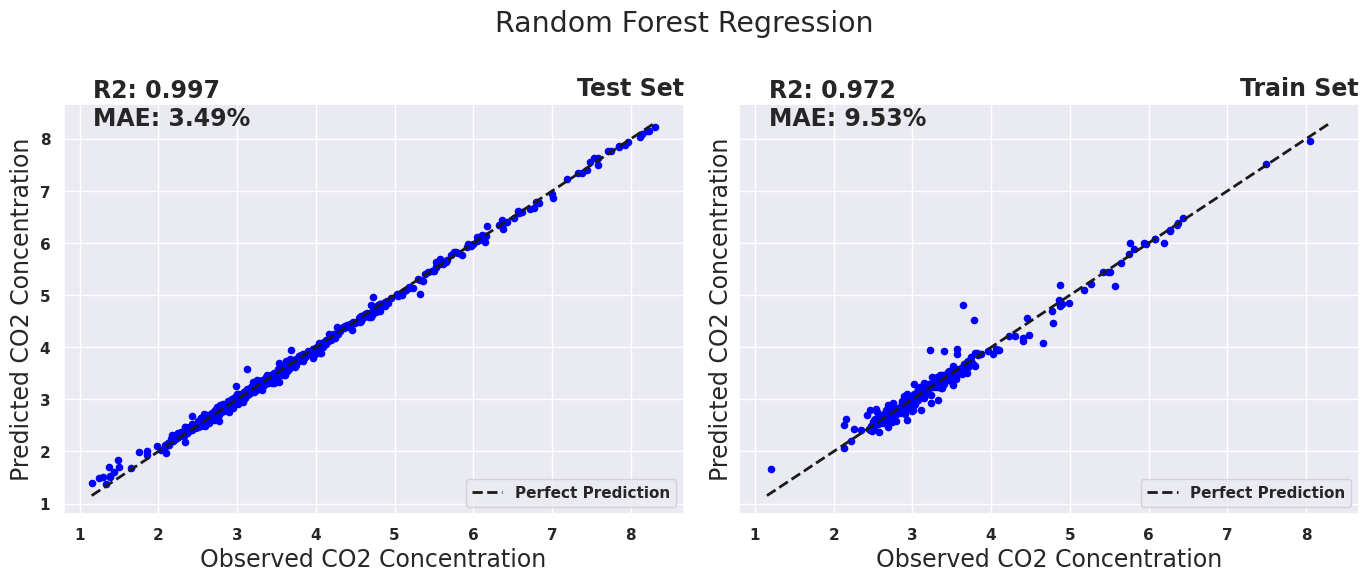

<Figure size 640x480 with 0 Axes>

In [ ]:
model_report(RandomForestRegressor(random_state = 42), x_train, y_train, x_test, y_test, model_type = 'Random Forest Regression')
plt.savefig('R plot')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


TRAINING DATASET
MAE:  3.49 %
R2_SCORE:  0.9971956275411704
----------------------------
TEST DATASET
MAE:  9.53 %
R2_SCORE:  0.9715303378162546
----------------------------


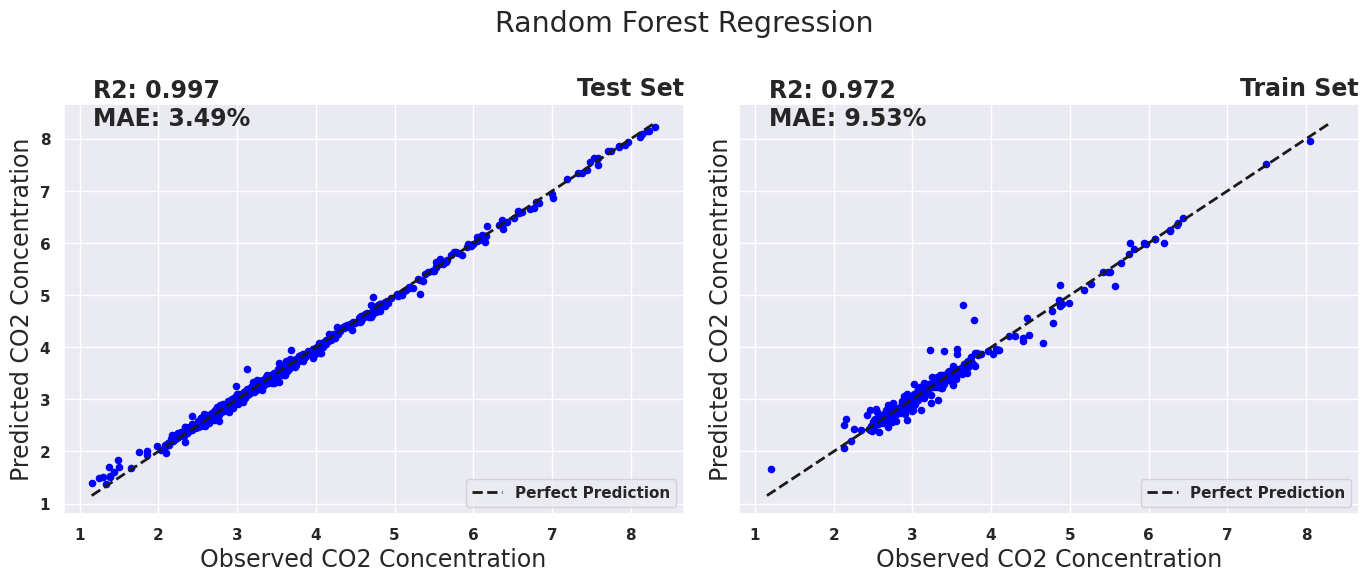

<Figure size 640x480 with 0 Axes>

In [ ]:
model_report(RandomForestRegressor(random_state = 42), x_train, y_train, x_test, y_test, model_type = 'Random Forest Regression')
plt.savefig('i plot')

In [ ]:
from sklearn.svm import SVR

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TRAINING DATASET
MAE:  54.21 %
R2_SCORE:  0.18698586429206443
----------------------------
TEST DATASET
MAE:  53.3 %
R2_SCORE:  0.16324821455496263
----------------------------


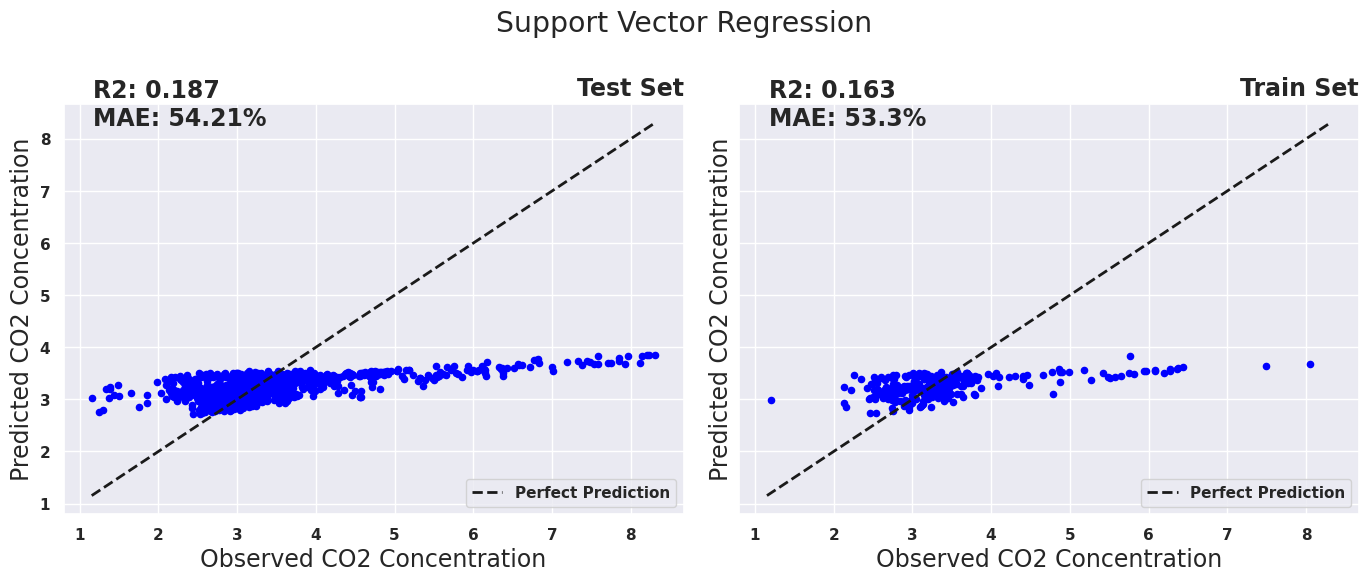

<Figure size 640x480 with 0 Axes>

In [ ]:
model_report(SVR(kernel='rbf'), x_train, y_train, x_test, y_test, model_type = 'Support Vector Regression')
plt.savefig('SVR plot')

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


TRAINING DATASET
MAE:  7.09 %
R2_SCORE:  0.991685285159373
----------------------------
TEST DATASET
MAE:  10.65 %
R2_SCORE:  0.9681185162433802
----------------------------


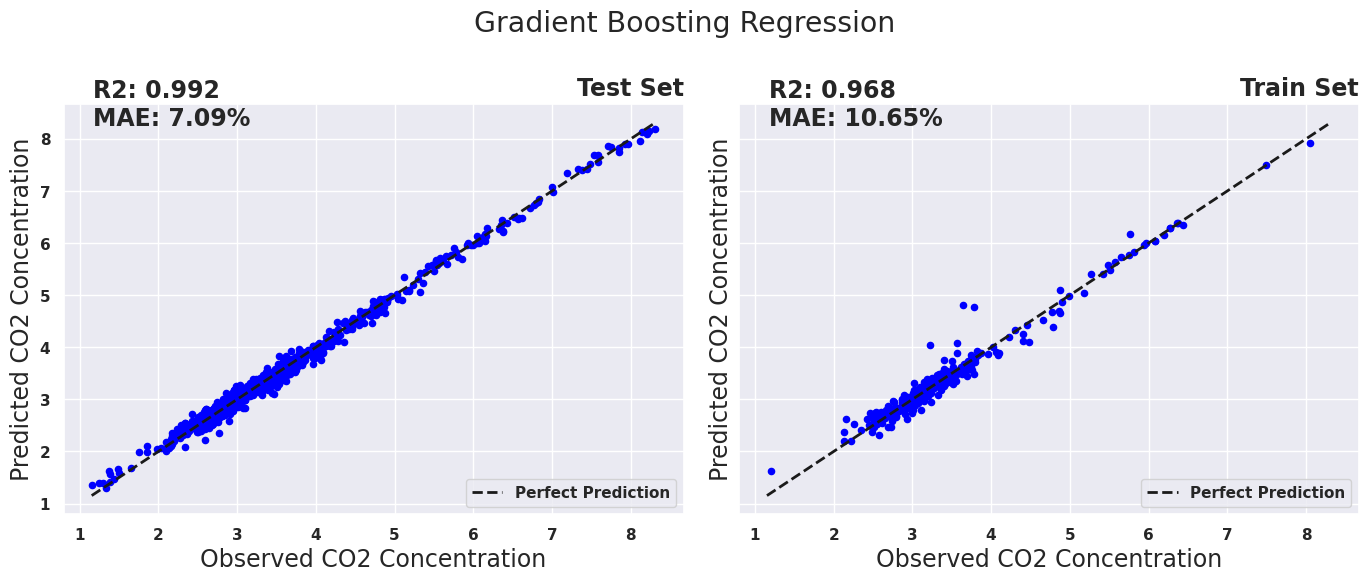

<Figure size 640x480 with 0 Axes>

In [ ]:
model_report(GradientBoostingRegressor(random_state = 42), x_train, y_train, x_test, y_test, model_type = 'Gradient Boosting Regression')
plt.savefig('GBR plot')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TRAINING DATASET
MAE:  18.7 %
R2_SCORE:  0.9476656787749552
----------------------------
TEST DATASET
MAE:  17.22 %
R2_SCORE:  0.9392781813678026
----------------------------


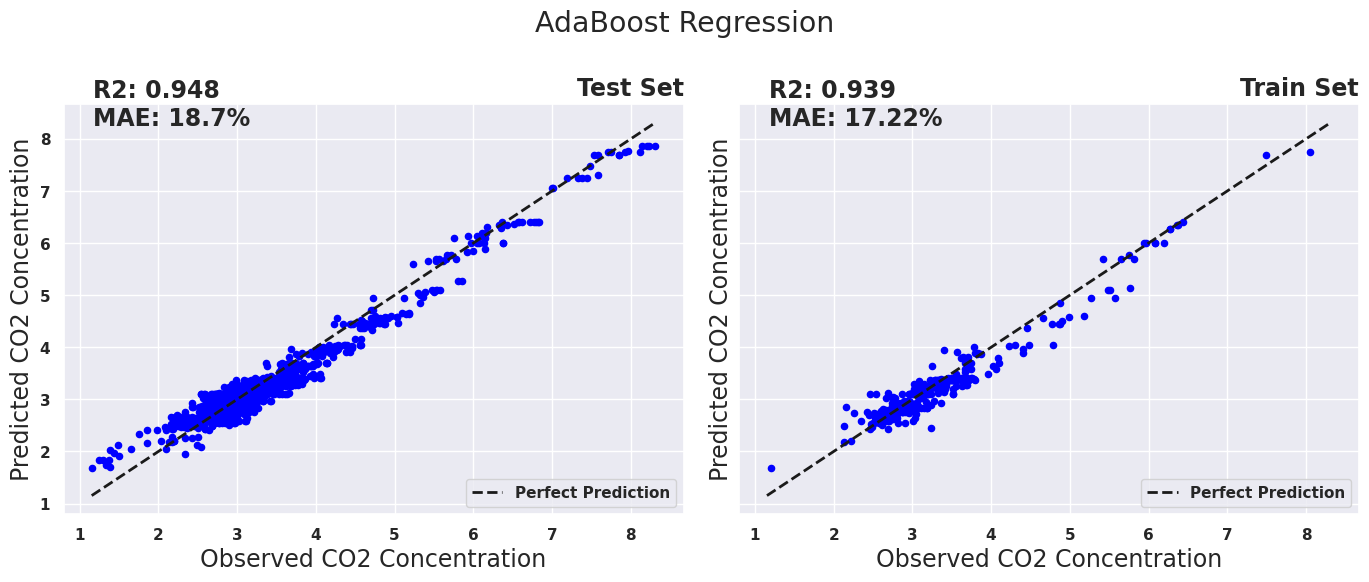

<Figure size 640x480 with 0 Axes>

In [ ]:
model_report(AdaBoostRegressor(random_state = 42), x_train, y_train, x_test, y_test, model_type = 'AdaBoost Regression')
plt.savefig('ADA plot')

In [ ]:
import tensorflow as tf

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 495.6075 - mean_squared_error: 495.6075 - val_loss: 1.4000 - val_mean_squared_error: 1.4000
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7804 - mean_squared_error: 3.7804 - val_loss: 0.8012 - val_mean_squared_error: 0.8012
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1112 - mean_squared_error: 1.1112 - val_loss: 0.8088 - val_mean_squared_error: 0.8088
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2561 - mean_squared_error: 1.2561 - val_loss: 0.8369 - val_mean_squared_error: 0.8369
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4786 - mean_squared_error: 1.4786 - val_loss: 0.7927 - val_mean_squared_error: 0.7927
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0621 - mean_squared_error: 1.0621 - val_loss: 0.8085 - val_mean_squared_error: 0.8085
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2804 - mean_squared_error: 1.2804 - val_loss: 1.2157 - val_mean_squar

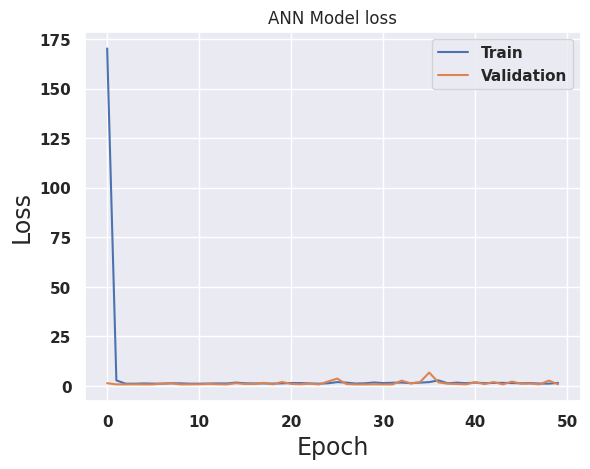

In [ ]:
# Define the ANN model
ANN = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
ANN.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = ANN.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test dataset
test_loss, test_mse = ANN.evaluate(x_test, y_test)
print("Test Mean Squared Error:", test_mse)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


def model_metric(model, trainX, trainy, testX, testy, silent: bool = False):
    """
    Helper function that trains the model and outputs the MAE and R2 Score for a given model

    Parameters:
    -- model: the model to be trained and evaluated
    -- trainX: input features for the training stage
    -- trainy: target for the training stage
    -- testX: input features for the testing stage
    -- testy: target for the testing stage

    Returns:
    training_predictions, test_predictions

    """

In [ ]:
model_report(ANN, x_train, y_train, x_test, y_test, model_type = 'ANN Model')

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse, r2_score as r2, mean_absolute_error as mae
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
ng = pd.read_excel('/content/NGC Gas (1).xlsx')
ng= ng[pd.to_numeric(ng['On line Heating value \nas gas chromotograph'], errors='coerce').notnull()]

# Define features (x) and target (y)
x = ng[['Propane','i-butane', 'Methane',	'Ethane', 'On line Heating value \nas gas chromotograph', 'Density']]
y = ng[['Carbon \nDioxide']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 42)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(random_state = 42)
model.fit(x_train, y_train)

# Make predictions on the training and test sets
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

# Calculate Mean Squared Error (MSE) for training and test sets
train_mse = mse(y_train, train_prediction)
test_mse = mse(y_test, test_prediction)

# Calculate Mean Absolute Error (MAE) for training and test sets
train_mae = mae(y_train, train_prediction)
test_mae = mae(y_test, test_prediction)

# Calculate R2 Score for training and test sets
train_r2_score = r2(y_train, train_prediction)
test_r2_score = r2(y_test, test_prediction)


# Print the results
print('TRAINING DATASET')
print('MAE: ', round(train_mae*100, 2), '%')
print('R2_SCORE: ', train_r2_score)
print('MSE: ', train_mse)
print('----------------------------')
print('TEST DATASET')
print('MAE: ', round(test_mae*100, 2), '%')
print('R2_SCORE: ', test_r2_score)
print('MSE: ', test_mse)
print('----------------------------')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


TRAINING DATASET
MAE:  3.49 %
R2_SCORE:  0.9971956275411704
MSE:  0.002885152197896738
----------------------------
TEST DATASET
MAE:  9.53 %
R2_SCORE:  0.9715303378162546
MSE:  0.02492550693896837
----------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: Random Forest Regression
TRAINING DATASET
MAE:  3.49 %
R2_SCORE:  0.9971956275411704
MSE:  0.002885152197896738
----------------------------
TEST DATASET
MAE:  9.53 %
R2_SCORE:  0.9715303378162546
MSE:  0.02492550693896837
----------------------------
Model: Support Vector Regression
TRAINING DATASET
MAE:  54.21 %
R2_SCORE:  0.18698586429206443
MSE:  0.8364329471192582
----------------------------
TEST DATASET
MAE:  53.3 %
R2_SCORE:  0.16324821455496263
MSE:  0.7325855255919532
----------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Model: Gradient Boosting Regression
TRAINING DATASET
MAE:  7.09 %
R2_SCORE:  0.991685285159373
MSE:  0.008554219580138097
----------------------------
TEST DATASET
MAE:  10.65 %
R2_SCORE:  0.9681185162433802
MSE:  0.027912594799032936
----------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: AdaBoost Regression
TRAINING DATASET
MAE:  18.7 %
R2_SCORE:  0.9476656787749552
MSE:  0.053841807436267576
----------------------------
TEST DATASET
MAE:  17.22 %
R2_SCORE:  0.9392781813678026
MSE:  0.05316262981609079
----------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: ANN Model
TRAINING DATASET
MAE:  67.52 %
R2_SCORE:  -0.2014256715774536
MSE:  1.2360328435897827
----------------------------
TEST DATASET
MAE:  65.46 %
R2_SCORE:  -0.2522228956222534
MSE:  1.0963351726531982
----------------------------


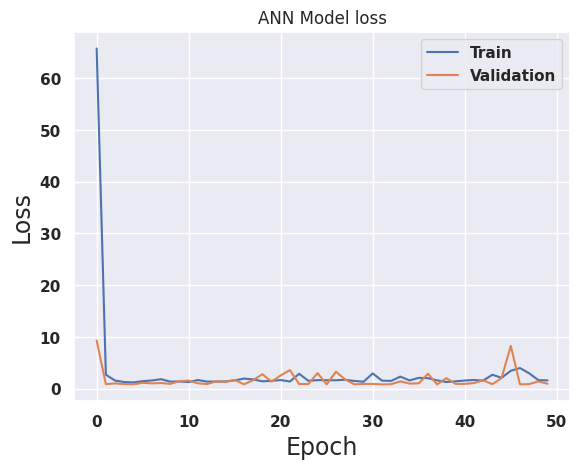

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse, r2_score as r2, mean_absolute_error as mae
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
ng = pd.read_excel('/content/NGC Gas (1).xlsx')
ng = ng[pd.to_numeric(ng['On line Heating value \nas gas chromotograph'], errors='coerce').notnull()]

# Define features (x) and target (y)
x = ng[['Propane', 'i-butane', 'Methane', 'Ethane', 'On line Heating value \nas gas chromotograph', 'Density']]
y = ng[['Carbon \nDioxide']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


def evaluate_model(model, model_name):
    """
    Helper function to train, predict, evaluate, and print metrics for a given model.
    """
    model.fit(x_train, y_train)
    train_prediction = model.predict(x_train)
    test_prediction = model.predict(x_test)

    train_mse = mse(y_train, train_prediction)
    test_mse = mse(y_test, test_prediction)
    train_mae = mae(y_train, train_prediction)
    test_mae = mae(y_test, test_prediction)
    train_r2_score = r2(y_train, train_prediction)
    test_r2_score = r2(y_test, test_prediction)


    print(f"Model: {model_name}")
    print('TRAINING DATASET')
    print('MAE: ', round(train_mae * 100, 2), '%')
    print('R2_SCORE: ', train_r2_score)
    print('MSE: ', train_mse)
    print('----------------------------')
    print('TEST DATASET')
    print('MAE: ', round(test_mae * 100, 2), '%')
    print('R2_SCORE: ', test_r2_score)
    print('MSE: ', test_mse)
    print('----------------------------')


# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
evaluate_model(rf_model, "Random Forest Regression")

# Support Vector Regression
svr_model = SVR(kernel='rbf')
evaluate_model(svr_model, "Support Vector Regression")


# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
evaluate_model(gbr_model, "Gradient Boosting Regression")


# AdaBoost Regressor
ada_model = AdaBoostRegressor(random_state=42)
evaluate_model(ada_model, "AdaBoost Regression")

# Define and evaluate the ANN model
ANN = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
ANN.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = ANN.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose = 0)

# Evaluate the model on the test dataset
test_loss, test_mse = ANN.evaluate(x_test, y_test, verbose = 0)
train_loss, train_mse = ANN.evaluate(x_train, y_train, verbose = 0)

train_prediction = ANN.predict(x_train)
test_prediction = ANN.predict(x_test)

train_mae = mae(y_train, train_prediction)
test_mae = mae(y_test, test_prediction)
train_r2_score = r2(y_train, train_prediction)
test_r2_score = r2(y_test, test_prediction)

print(f"Model: ANN Model")
print('TRAINING DATASET')
print('MAE: ', round(train_mae * 100, 2), '%')
print('R2_SCORE: ', train_r2_score)
print('MSE: ', train_mse)
print('----------------------------')
print('TEST DATASET')
print('MAE: ', round(test_mae * 100, 2), '%')
print('R2_SCORE: ', test_r2_score)
print('MSE: ', test_mse)
print('----------------------------')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
!pip install gradio tensorflow scikit-learn pandas

import gradio as gr
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import tensorflow as tf



# Load your dataset and train your models as you did before
# ... (Your existing code for data loading and model training) ...

# Assuming your features are: 'Propane', 'i-butane', 'Methane', 'Ethane', 'On line Heating value \nas gas chromotograph', 'Density'
# and your target is: 'Carbon \nDioxide'


# Load your trained models
rf_model = RandomForestRegressor(random_state=42)  # Load your trained Random Forest model
svr_model = SVR(kernel='rbf')  # Load your trained SVR model
gbr_model = GradientBoostingRegressor(random_state=42)  # Load your trained GBR model
ada_model = AdaBoostRegressor(random_state=42)  # Load your trained AdaBoost model
# ... (Load your trained ANN model, if you have saved it) ...


# Function to make predictions using all models
def predict_co2(Propane, i_butane, Methane, Ethane, Heating_value, Density):
    input_data = np.array([Propane, i_butane, Methane, Ethane, Heating_value, Density]).reshape(1, -1)

    # Scale input data using the same scaler used during training (if any)
    # For example, if you used StandardScaler:
    # sc = StandardScaler()
    # input_data = sc.transform(input_data)

    rf_prediction = rf_model.predict(input_data)[0]
    svr_prediction = svr_model.predict(input_data)[0]
    gbr_prediction = gbr_model.predict(input_data)[0]
    ada_prediction = ada_model.predict(input_data)[0]

    # ANN prediction (if you loaded the ANN model)
    # ann_prediction = ANN.predict(input_data)[0][0]

    return {
        "Random Forest": rf_prediction,
        "Support Vector Regression": svr_prediction,
        "Gradient Boosting Regression": gbr_prediction,
        "AdaBoost Regression": ada_prediction,
       # "ANN": ann_prediction  # Uncomment if you have the ANN model
    }


# Create the Gradio interface
iface = gr.Interface(
    fn=predict_co2,
    inputs=[
        gr.Number(label="Propane"),
        gr.Number(label="i-butane"),
        gr.Number(label="Methane"),
        gr.Number(label="Ethane"),
        gr.Number(label="Heating Value"),
        gr.Number(label="Density"),
    ],
    outputs=gr.Label(label="CO2 Concentration Predictions"),
    title="CO2 Concentration Prediction App",
    description="Predict CO2 concentration using different machine learning models.",
)

# Launch the Gradio app
iface.launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
to

In [ ]:
!pip install gradio tensorflow scikit-learn pandas

import gradio as gr
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import tensorflow as tf



# Load your dataset and train your models as you did before
# ... (Your existing code for data loading and model training) ...

# Assuming your features are: 'Propane', 'i-butane', 'Methane', 'Ethane', 'On line Heating value \nas gas chromotograph', 'Density'
# and your target is: 'Carbon \nDioxide'


# Load your trained models
rf_model = RandomForestRegressor(random_state=42)  # Load your trained Random Forest model
svr_model = SVR(kernel='rbf')  # Load your trained SVR model
gbr_model = GradientBoostingRegressor(random_state=42)  # Load your trained GBR model
ada_model = AdaBoostRegressor(random_state=42)  # Load your trained AdaBoost model
# ... (Load your trained ANN model, if you have saved it) ...


# Function to make predictions using all models
def predict_co2(Propane, i_butane, Methane, Ethane, Heating_value, Density):
    input_data = np.array([Propane, i_butane, Methane, Ethane, Heating_value, Density]).reshape(1, -1)

    # Scale input data using the same scaler used during training (if any)
    # For example, if you used StandardScaler:
    # sc = StandardScaler()
    # input_data = sc.transform(input_data)

    rf_prediction = rf_model.predict(input_data)[0]
    svr_prediction = svr_model.predict(input_data)[0]
    gbr_prediction = gbr_model.predict(input_data)[0]
    ada_prediction = ada_model.predict(input_data)[0]

    # ANN prediction (if you loaded the ANN model)
    # ann_prediction = ANN.predict(input_data)[0][0]

    return {
        "Random Forest": rf_prediction,
        "Support Vector Regression": svr_prediction,
        "Gradient Boosting Regression": gbr_prediction,
        "AdaBoost Regression": ada_prediction,
       # "ANN": ann_prediction  # Uncomment if you have the ANN model
    }


# Create the Gradio interface
iface = gr.Interface(
    fn=predict_co2,
    inputs=[
        gr.Number(label="Propane"),
        gr.Number(label="i-butane"),
        gr.Number(label="Methane"),
        gr.Number(label="Ethane"),
        gr.Number(label="Heating Value"),
        gr.Number(label="Density"),
    ],
    outputs=gr.Label(label="CO2 Concentration Predictions"),
    title="CO2 Concentration Prediction App",
    description="Predict CO2 concentration using different machine learning models.",
)

# Launch the Gradio app
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://169f90e4b5a989f880.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install gradio tensorflow scikit-learn pandas

import gradio as gr
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load the dataset
ng = pd.read_excel('/content/NGC Gas (1).xlsx')
ng = ng[pd.to_numeric(ng['On line Heating value \nas gas chromotograph'], errors='coerce').notnull()]

# Define features (x) and target (y)
x = ng[['Propane', 'i-butane', 'Methane', 'Ethane', 'On line Heating value \nas gas chromotograph', 'Density']]
y = ng[['Carbon \nDioxide']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Train your models here
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)

gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(x_train, y_train)

ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(x_train, y_train)

# ANN model (if you have it)
# ... (Your code to train and load the ANN model) ...

# Create a dictionary to store the models
models = {
    "Random Forest": rf_model,
    "Support Vector Regression": svr_model,
    "Gradient Boosting Regression": gbr_model,
    "AdaBoost Regression": ada_model,
    # "ANN": ANN  # Uncomment if you have the ANN model
}

# Function to make predictions
def predict_co2(model_choice, Propane, i_butane, Methane, Ethane, Heating_value, Density):
    selected_model = models[model_choice]  # Get the selected model from the dictionary
    input_data = np.array([Propane, i_butane, Methane, Ethane, Heating_value, Density]).reshape(1, -1)

    # Apply scaling if necessary
    # For example, if you used StandardScaler during training:
    # scaler = StandardScaler()
    # scaler.fit(x_train)  # Fit the scaler on training data
    # input_data = scaler.transform(input_data)

    prediction = selected_model.predict(input_data)[0]
    return prediction

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_co2,
    inputs=[
        gr.Dropdown(list(models.keys()), label="Select Model"),  # Dropdown for model selection
        gr.Number(label="Propane"),
        gr.Number(label="i-butane"),
        gr.Number(label="Methane"),
        gr.Number(label="Ethane"),
        gr.Number(label="Heating Value"),
        gr.Number(label="Density"),
    ],
    outputs=gr.Label(label="CO2 Concentration Prediction"),
    title="CO2 Concentration Prediction App",
    description="Predict CO2 concentration using different machine learning models.",
)

# Launch the Gradio app
iface.launch()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fb36c1f4e3bf78544e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
